**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/distributions).**

---


In this exercise, you will use your new knowledge to propose a solution to a real-world scenario.  To succeed, you will need to import data into Python, answer questions using the data, and generate **histograms** and **density plots** to understand patterns in the data.

## Scenario

You'll work with a real-world dataset containing information collected from microscopic images of breast cancer tumors, similar to the image below.

![ex4_cancer_image](https://i.imgur.com/qUESsJe.png)

Each tumor has been labeled as either [**benign**](https://en.wikipedia.org/wiki/Benign_tumor) (_noncancerous_) or **malignant** (_cancerous_).

To learn more about how this kind of data is used to create intelligent algorithms to classify tumors in medical settings, **watch the short video [at this link](https://www.youtube.com/watch?v=9Mz84cwVmS0)**.



## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [5]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up our feedback system.

In [7]:
# Set up code checking
import os
if not os.path.exists("../input/cancer_b.csv"):
    os.symlink("../input/data-for-datavis/cancer_b.csv", "../input/cancer_b.csv")
    os.symlink("../input/data-for-datavis/cancer_m.csv", "../input/cancer_m.csv")
from learntools.core import binder
binder.bind(globals())
from learntools.data_viz_to_coder.ex5 import *
print("Setup Complete")

Setup Complete


## Step 1: Load the data

In this step, you will load the data.
- Load the data file into a DataFrame called `cancer_data`.  
- The corresponding filepath is `cancer_filepath`.  
- Use the `"Id"` column to label the rows.

In [9]:
# Path of the files to read
cancer_filepath = "../input/cancer.csv"

# Fill in the line below to read the file into a variable cancer_data
cancer_data =pd.read_csv(cancer_filepath, index_col="Id")

# Run the line below with no changes to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_1.hint()
#step_1.solution()

## Step 2: Review the data

Use a Python command to print the first 5 rows of the data.

In [10]:
# Print the first five rows of the data
cancer_data.head() # Your code here

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In the dataset, each row corresponds to a different image.  The dataset has 31 different columns, corresponding to:
- 1 column (`'Diagnosis'`) that classifies tumors as either benign (which appears in the dataset as **`B`**) or malignant (__`M`__), and
- 30 columns containing different measurements collected from the images.

Use the first 5 rows of the data to answer the questions below.

In [11]:
# Fill in the line below: In the first five rows of the data, what is the
# largest value for 'Perimeter (mean)'?
max_perim = 87.46

# Fill in the line below: What is the value for 'Radius (mean)' for the tumor with Id 8510824?
mean_radius = 9.504

# Check your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [ ]:
# Lines below will give you a hint or solution code
#step_2.hint()
#step_2.solution()

## Step 3: Investigating differences

#### Part A

Use the code cell below to create two histograms that show the distribution in values for `'Area (mean)'`, separately for both benign and malignant tumors.  (_To permit easy comparison, create a single figure containing both histograms in the code cell below._)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

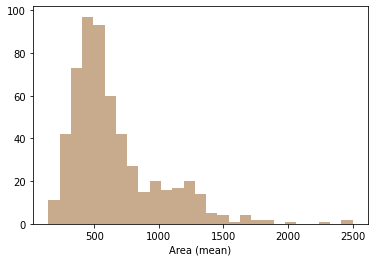

In [12]:
# Histograms for benign and maligant tumors
sns.distplot(a=cancer_data['Area (mean)'], label="Benign", kde=False)# Your code here (benign tumors)
sns.distplot(a=cancer_data['Area (mean)'], label="Malignant", kde=False) # Your code here (malignant tumors)

# Check your answer
step_3.a.check()

In [ ]:
# Lines below will give you a hint or solution code
#step_3.a.hint()
#step_3.a.solution_plot()

#### Part B

A researcher approaches you for help with identifying how the `'Area (mean)'` column can be used to understand the difference between benign and malignant tumors.  Based on the histograms above, 
- Do malignant tumors have higher or lower values for `'Area (mean)'` (relative to benign tumors), on average?
- Which tumor type seems to have a larger range of potential values?

In [ ]:
#step_3.b.hint()

In [13]:
# Check your answer (Run this code cell to receive credit!)
step_3.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> Malignant tumors have higher values for `'Area (mean)'`, on average. Malignant tumors have a larger range of potential values.

## Step 4: A very useful column

#### Part A

Use the code cell below to create two KDE plots that show the distribution in values for `'Radius (worst)'`, separately for both benign and malignant tumors.  (_To permit easy comparison, create a single figure containing both KDE plots in the code cell below._)

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

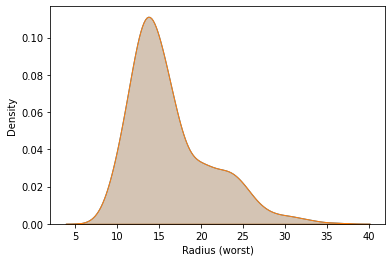

In [14]:
# KDE plots for benign and malignant tumors
sns.kdeplot(data=cancer_data['Radius (worst)'], shade=True, label="Benign") # Your code here (benign tumors)
sns.kdeplot(data=cancer_data['Radius (worst)'], shade=True, label="Malignant") # Your code here (malignant tumors)

# Check your answer
step_4.a.check()

In [ ]:
# Lines below will give you a hint or solution code
#step_4.a.hint()
#step_4.a.solution_plot()

#### Part B

A hospital has recently started using an algorithm that can diagnose tumors with high accuracy.  Given a tumor with a value for `'Radius (worst)'` of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?

In [ ]:
#step_4.b.hint()

In [15]:
# Check your answer (Run this code cell to receive credit!)
step_4.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> The algorithm is more likely to classify the tumor as malignant. This is because the curve for malignant tumors is much higher than the curve for benign tumors around a value of 25 -- and an algorithm that gets high accuracy is likely to make decisions based on this pattern in the data.

## Keep going

Review all that you've learned and explore how to further customize your plots in the **[next tutorial](https://www.kaggle.com/alexisbcook/choosing-plot-types-and-custom-styles)**!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*